<a href="https://colab.research.google.com/github/kartheikiyer/CANUCS-DR-Notebooks/blob/jules_wip_4550658658641134423/exploring_single_galaxy_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring a Single CANUCS Galaxy
This tutorial will guide you through the process of loading and exploring data for a single galaxy from the CANUCS survey using the `CANUCSGalaxy` class.

## 1. Imports

First, we need to import the necessary libraries.
- `numpy` for numerical operations.
- `matplotlib.pyplot` for plotting.
- `CANUCSGalaxy` from `canucs_fns.py` which contains the main class to interact with the galaxy data.
- `os` for operating system dependent functionality (like changing directory if needed, though typically not required if files are in the same directory).
- `datasets` from Hugging Face for loading the data.

The `canucs_fns.py` file should be in the same directory as this notebook, or accessible in your Python path.

In [1]:
# clone the repo with
!git clone https://github.com/kartheikiyer/CANUCS-DR-Notebooks.git
# cd CANUCS-DR-Notebooks

!pip install corner datasets=='3.6.0' -q

Cloning into 'CANUCS-DR-Notebooks'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 8), reused 13 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 6.35 MiB | 5.52 MiB/s, done.
Resolving deltas: 100% (8/8), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 8.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os
os.chdir('CANUCS-DR-Notebooks')
# Ensure you have 'canucs_fns.py' in the same directory or your PYTHONPATH
from canucs_fns import CANUCSGalaxy
# if this doesn't work install the datasets package with pip install datasets
# datasets has a few breaking dependencies so use datasets=='3.6.0' in case you hit an error
import datasets
from datasets import load_dataset

## 2. Initializing the CANUCSGalaxy Class

To work with a specific galaxy, we need to initialize the `CANUCSGalaxy` class with its `canucs_id`.

### Finding a `canucs_id`
The CANUCS survey has a list of identified galaxies. You can find a list of these IDs in the `canucs_idlist.dat` file or a smaller subset in `smallidlist.npz`. Let's load and inspect `canucs_idlist.dat` to see some available IDs.

The ID is a 7-digit number. The first digit refers to the cluster, and the second to the field (clu, ncf, nsf).
- Cluster key: {'1':'macs0417','2':'a370','3':'macs0416','4':'macs1423','5':'macs1149'}
- Field key: {'1':'clu', '2':'ncf', '3':'nsf'}

For this tutorial, we'll use the galaxy with `canucs_id = 1102637`. This ID is known to be in the `smallidlist.npz` which is used by default in the `CANUCSGalaxy` class for quick demonstrations.

In [3]:
# Displaying a few IDs from canucs_idlist.dat for user reference
try:
    canucs_ids_table = Table.read('canucs_idlist.dat', format='ascii')
    print("Sample CANUCS IDs from canucs_idlist.dat:")
    print(canucs_ids_table[:5]) # Print first 5 IDs as an example
except FileNotFoundError:
    print("canucs_idlist.dat not found. Make sure it's in the same directory.")

# Also show the small_idlist which is used by default in CANUCSGalaxy
try:
    small_idlist = np.load('smallidlist.npz')['all_idx']
    print("\nFirst few IDs from smallidlist.npz (used by default in CANUCSGalaxy for demo):")
    print(small_idlist[:5])
except FileNotFoundError:
    print("\nsmallidlist.npz not found. Make sure it's in the same directory.")

# Define the ID we'll use for this tutorial
tutorial_canucs_id = 1102637
print(f"\nWe will use canucs_id: {tutorial_canucs_id} for this tutorial.")

Sample CANUCS IDs from canucs_idlist.dat:
   id           ra        ...        z_phot               z_ml       
------- ----------------- ... ------------------- -------------------
1100001 64.41805826665747 ...                -1.0                -1.0
1100002 64.41367678077812 ...  0.3031376898288727  0.3031376898288727
1100003 64.40381545576437 ...                -1.0                -1.0
1100004 64.41809310785851 ... 0.08871957659721375 0.08871957659721375
1100005 64.40591566413323 ...   0.145921528339386   0.145921528339386

First few IDs from smallidlist.npz (used by default in CANUCSGalaxy for demo):
[1100036 1100039 1100041 1100042 1100043]

We will use canucs_id: 1102637 for this tutorial.


Now, let's create an instance of the `CANUCSGalaxy` class for our chosen galaxy. When you instantiate the class, it will load the galaxy's data from the Hugging Face dataset "kiyer/canucs_test". This might take a moment depending on your internet connection and if the data needs to be downloaded.

In [4]:
cg = CANUCSGalaxy(canucs_id=tutorial_canucs_id)
print("\nCANUCSGalaxy object created successfully.")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.54k [00:00<?, ?B/s]

train-00000-of-00006.parquet:   0%|          | 0.00/374M [00:00<?, ?B/s]

train-00001-of-00006.parquet:   0%|          | 0.00/393M [00:00<?, ?B/s]

train-00002-of-00006.parquet:   0%|          | 0.00/313M [00:00<?, ?B/s]

train-00003-of-00006.parquet:   0%|          | 0.00/238M [00:00<?, ?B/s]

train-00004-of-00006.parquet:   0%|          | 0.00/278M [00:00<?, ?B/s]

train-00005-of-00006.parquet:   0%|          | 0.00/276M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1297 [00:00<?, ? examples/s]

loaded data

CANUCSGalaxy object created successfully.


## 3. Displaying Basic Galaxy Information

Once the `CANUCSGalaxy` object (`cg`) is created, you can display some basic information about the loaded galaxy. The `print_canucs_id()` method prints the galaxy's CANUCS ID and the field it belongs to.

The CANUCS survey observes several galaxy cluster fields. The `fieldname` (e.g., 'macs0417clu') tells you which specific cluster and sub-field (clu, ncf, or nsf) this galaxy is located in.

In [5]:
cg.print_canucs_id()

Galaxy with CANUCS ID: 1102637 is in field macs0417clu


## 4. Plotting Photometric Redshift (Photo-z) PDF

The `plot_photoz_posterior()` method allows you to visualize the probability distribution function (PDF) for the galaxy's photometric redshift.

**What is a Photometric Redshift?**
Redshift (z) is a measure of how much the light from a distant object has been stretched due to the expansion of the Universe. It's a key indicator of distance.
- **Spectroscopic redshifts** are very accurate but require taking a spectrum of the galaxy, which is time-consuming.
- **Photometric redshifts (photo-z's)** are estimated by observing the galaxy's brightness in several different filters (colors). While less precise than spectroscopic redshifts, they can be obtained for many more galaxies.

The PDF shows the probability of the galaxy being at different redshifts based on its photometry. A sharp peak indicates a more certain photo-z. The plot also displays the best-fit photometric redshift (`z_phot`) as a vertical line and the chi-squared (`χ²`) value from the [EAZY](https://github.com/gbrammer/eazy-photoz) fit. A lower `χ²` generally indicates a better fit.

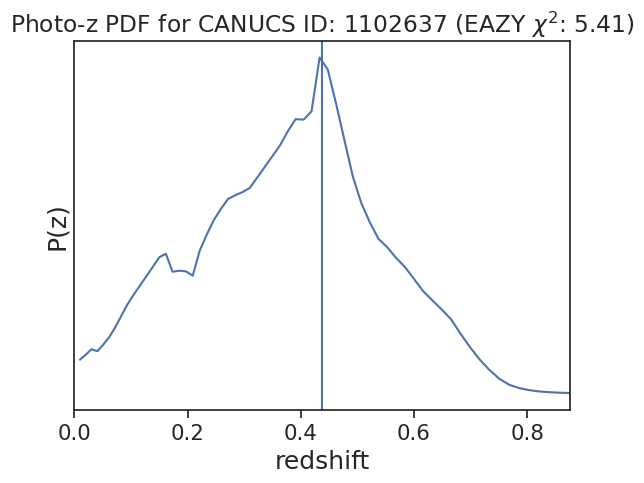

In [6]:
cg.plot_photoz_posterior()

## 5. Plotting Image Cutouts

The `plot_cutout()` method is used to display a mosaic of image cutouts for the galaxy in different JWST NIRISS filters.

**Understanding the Output:**
The plot shows several images:
- **Detection Image:** Typically a deep, combined image where the galaxy was initially detected. CANUCS uses the $\chi^2$ image as the detection image.
- **Segmentation Map:** An image showing how the different sources in the field have been segmented. Different colors represent different detected objects.
- **RGB Composite Image:** A color image created by combining three different filter images (e.g., F444W for red, F277W for green, F150W for blue by default). This helps visualize the galaxy's overall color and morphology. The filters used for RGB are listed on the plot.
- **Individual Filter Cutouts:** Grayscale cutouts of the galaxy as seen in each of the filters specified in the `filt_list` parameter. The filter name is displayed on each subplot.

**Customization:**
You can customize the plot using several parameters:
- `plt_per_row`: Number of plots per row in the mosaic.
- `filt_list`: A list of strings specifying which filter cutouts to display. By default, it shows: `['F090W', 'F115W', 'F150W', 'F200W', 'F277W', 'F356W', 'F410M', 'F444W']`.
- `filts_RGB`: A list of three filter names to be used for the R, G, and B channels of the color composite image. Default is `['F444W','F277W','F150W']`.
- `vmin`, `vmax_det_im`, `vmax_cutouts`: Parameters to control the image scaling (minimum and maximum pixel values for display) for the detection image and other cutouts.
- `cmap`: Colormap for the segmentation map (default is 'Spectral').

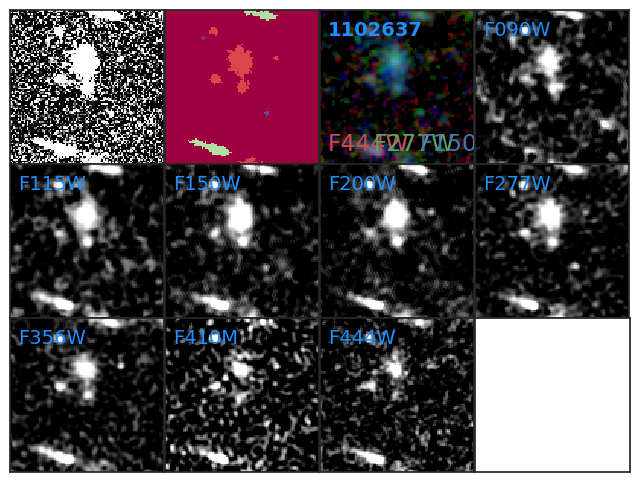

In [7]:
# Plot cutouts with default parameters
cg.plot_cutout()

Let's try customizing the `filt_list` to show fewer filters and change the RGB composite.

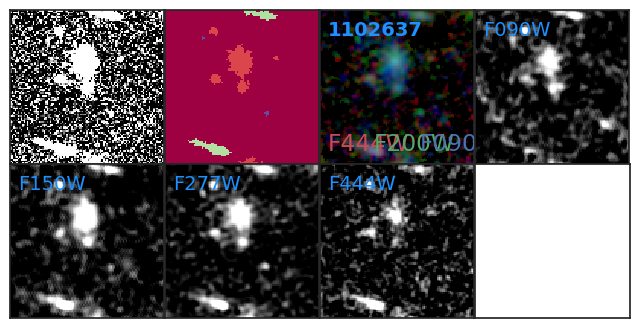

In [8]:
# Example of plotting with a custom list of filters and different RGB filters
cg.plot_cutout(filt_list=['F090W', 'F150W', 'F277W', 'F444W'],
               filts_RGB=['F444W', 'F200W', 'F090W'])

## 6. Plotting Spectral Energy Distribution (SED) Fits

The `plot_sed_fits()` method displays a comprehensive plot summarizing the results of fitting the galaxy's observed photometry (its brightness in different filters) with theoretical galaxy models. This process helps astronomers infer physical properties of the galaxy, such as its stellar mass, star formation rate, age, and dust content.

The CANUCS data release includes fits using two different SED fitting codes/models, described in further detail in the paper:
- **[Dense Basis](https://dense-basis.readthedocs.io/en/latest/):** A non-parametric approach to fitting SEDs.
- **[Bagpipes](https://bagpipes.readthedocs.io/en/latest/):** A Bayesian spectral fitting code.

The plot generated by `plot_sed_fits()` (if `bp_fits_exist` is True for the galaxy) includes:

**a) Corner Plot (Top-Left Quadrants):**
- This shows the posterior probability distributions for several key physical parameters derived from the SED fitting.
- Typically, it displays parameters like:
    - `log M*`: Logarithm of the stellar mass (in solar masses).
    - `log SFR_inst`: Logarithm of the instantaneous Star Formation Rate (in solar masses per year).
    - `A_V`: V-band Dust attenuation (in magnitudes).
    - `log Z/Z_sun`: Logarithm of the metallicity relative to the Sun.
- The contours show regions of 1-sigma and 2-sigma confidence. The histograms on the diagonal show the marginalized PDF for each parameter.
- Results from Dense Basis are often shown in one color (dodgerblue) and Bagpipes in another tomato).

**b) SED Plot (Top-Right):**
- **Observed Photometry:** Black points with error bars show the galaxy's measured flux density in different filters at their respective wavelengths.
- **Model Photometry:** Colored circles (dodgerblue for Dense Basis, tomato for Bagpipes) show the predicted flux densities from the best-fit models in those same filters.
- **Model Spectra:** Colored lines show the full best-fit model spectra over a wider wavelength range.
- **Key Information:**
    - The CANUCS ID and field are displayed.
    - `χ²_DoF`: The reduced chi-squared value for each fit, indicating goodness-of-fit (lower is generally better).
    - `z_phot`: The photometric redshift used for the fitting.
- The y-axis is typically log-scaled flux density (in microJanskys, µJy), and the x-axis is log-scaled wavelength (in microns, µm).

**c) Residuals Plot (Middle-Right, below SED plot):**
- This plot shows the residuals of the fit, usually in terms of `χ = (data - model) / uncertainty`.
- Points closer to zero indicate better agreement between the model and observed photometry for that filter.

**d) Star Formation History (SFH) Plot (Bottom-Left or Bottom-Right):**
- This illustrates the inferred star formation rate of the galaxy as a function of lookback time (or age of the Universe).
- Shaded regions often represent confidence intervals (e.g., 16th to 84th percentile), and solid lines show the median or best-fit SFH.
- Again, results from Dense Basis and Bagpipes are shown in their respective colors.
- The x-axis is lookback time (in Gigayears, Gyr), and the y-axis is Star Formation Rate (SFR) in solar masses per year (M_sun/yr).

*Note: If `bp_fits_exist` is False for a particular galaxy, only the Dense Basis fits are shown (TBD).*

showing both Dense Basis and Bagpipes fits


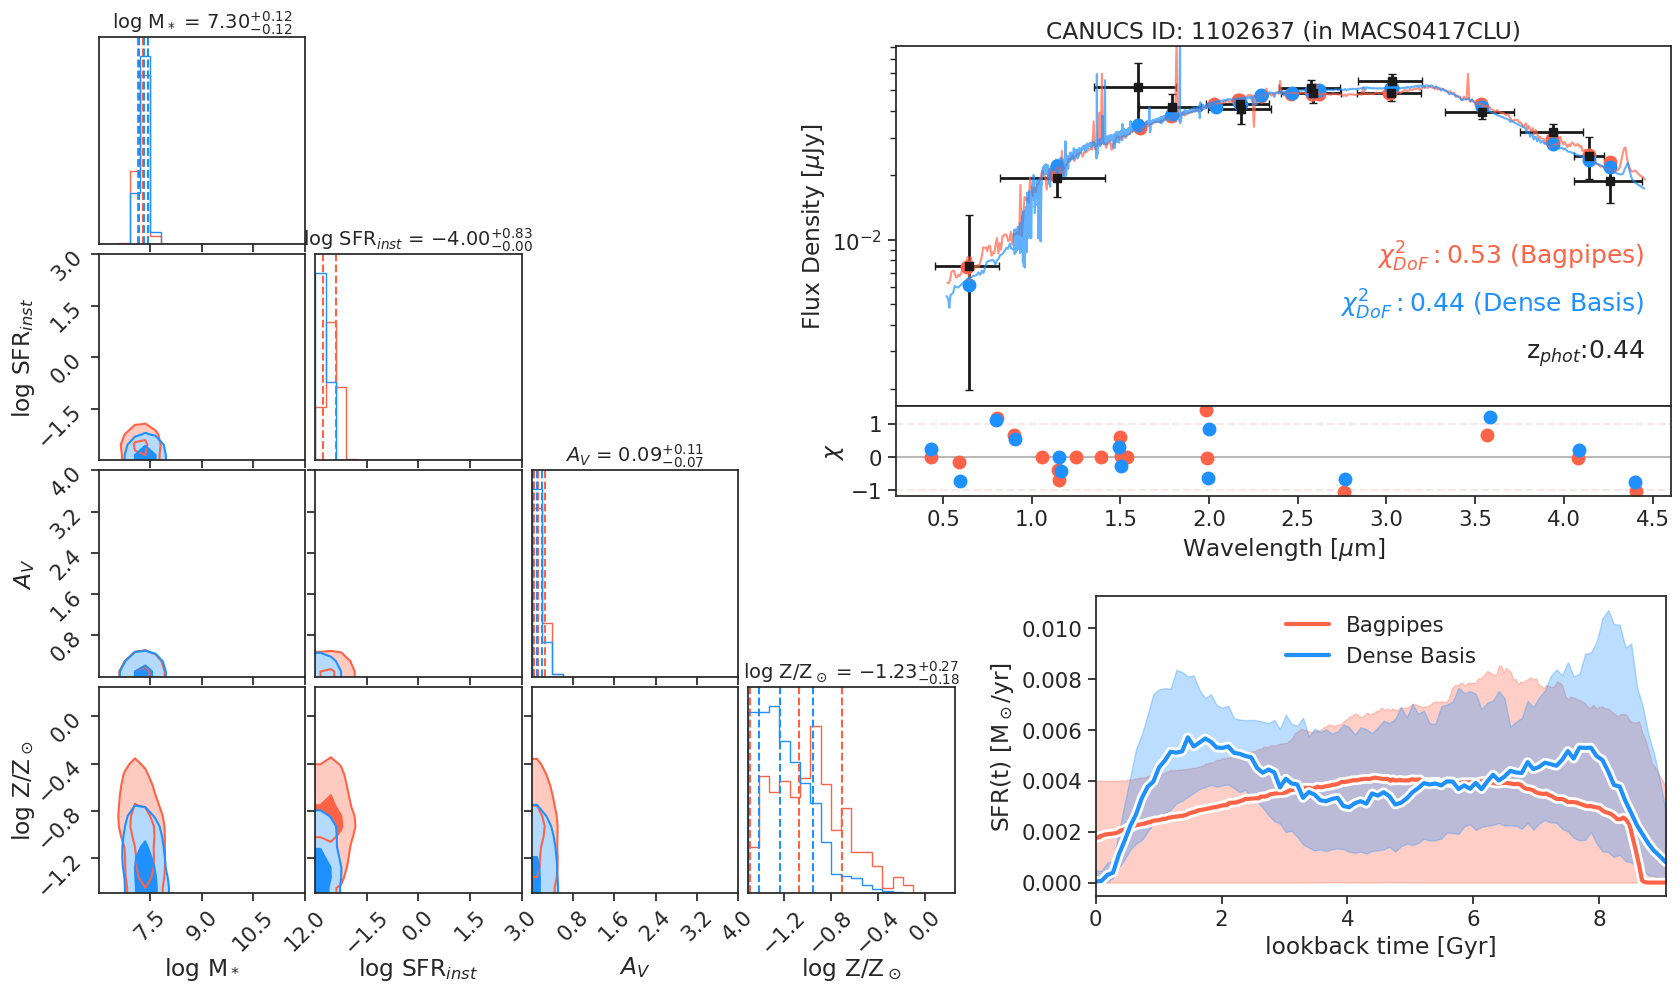

In [9]:
cg.plot_sed_fits()

## 7. Accessing Underlying Data

Beyond the pre-defined plots, you can directly access the underlying data associated with the loaded CANUCS galaxy. This is useful for custom analysis or plotting.

The `CANUCSGalaxy` object stores data in a structure similar to a dictionary, where each piece of information is associated with a 'key'.

### 7.1 Listing Available Data Keys

To see all the data keys available for the current galaxy, you can use the `list_keys()` method. This will print a list of all items you can retrieve.

In [10]:
cg.list_keys()

# Available keys are:

timeax_db
sfh_50_db
sfh_16_db
sfh_84_db
chi2_db
residuals_db
lam_db
spec_db
lam_centers_db
sed_db
corner_db_theta
corner_db_wts
timeax_bp
sfh_50_bp
sfh_16_bp
sfh_84_bp
chi2_bp
residuals_bp
lam_bp
spec_bp
lam_centers_bp
sed_bp
corner_bp_samples
bp_fits_exist
canucs_id
z_phot
lam_widths_db
sed_obs
err_obs
corner_labels
corner_ranges
SOURCE
SED_OBS
SED_ERR
SED_USEFLAG
SED_EAZY
SPEC_EAZY
SPEC_LAM_EAZY
EAZY_ZPDF
EAZY_Z
EAZY_CHI2
det_im
segm
rgb
F435W
F606W
F814W
F090W
F105W
F115WN
F115W
F125W
F140W
F150WN
F150W
F160W
F200WN
F200W
F277W
F356W
F410M
F444W


### 7.2 Retrieving Data with `get_key()`

Once you know the key for the data you're interested in, you can retrieve it using the `get_key()` method.

- For filter data (keys starting with 'F', e.g., 'F090W'), this method returns a 2D numpy array representing the image cutout.
- For other scalar or 1D array data (e.g., 'z_phot', 'chi2_db'), it returns the corresponding value or numpy array.

Let's try retrieving a few examples:

Shape of F090W image data: (101, 101)


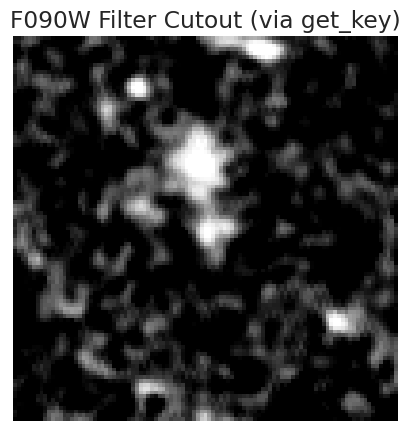

In [11]:
# Example 1: Get the F090W filter image data
f090w_image_data = cg.get_key('F090W')

# Display its shape and plot it using matplotlib
print(f"Shape of F090W image data: {f090w_image_data.shape}")

plt.figure(figsize=(5,5))
plt.imshow(f090w_image_data, origin='lower', cmap='Greys_r', vmin=0, vmax=0.5) # Adjust vmin/vmax as needed
plt.title("F090W Filter Cutout (via get_key)")
plt.axis('off')
plt.show()

In [12]:
# Example 2: Get the photometric redshift (z_phot)
z_phot_value = cg.get_key('z_phot')
print(f"Photometric redshift (z_phot): {z_phot_value}")

# Example 3: Get the chi-squared value from Dense Basis SED fit
chi2_db_value = cg.get_key('chi2_db')
print(f"Dense Basis SED fit chi-squared (chi2_db): {chi2_db_value}")

Photometric redshift (z_phot): 0.4379931688308716
Dense Basis SED fit chi-squared (chi2_db): 0.4366894645302451


### 7.3 Specific Getter Methods for SFH and SED data

The `CANUCSGalaxy` class also provides specific getter methods for retrieving structured data like Star Formation Histories (SFH) and Spectral Energy Distributions (SEDs) from the Dense Basis and Bagpipes fits. These are convenient as they return multiple related arrays at once.

- `get_sfh_dense_basis()`: Returns `timeax_db, sfh_16_db, sfh_50_db, sfh_84_db`
- `get_sfh_bagpipes()`: Returns `timeax_bp, sfh_16_bp, sfh_50_bp, sfh_84_bp`
- `get_sed_dense_basis()`: Returns `db_sed, lam_centers_db, db_lam, db_spec, db_residuals`
- `get_sed_bagpipes()`: Returns `bp_sed, lam_centers_bp, bp_lam, bp_spec, bp_residuals`

Dense Basis SFH data retrieved.
Time axis shape: (100,)
SFH 50th percentile shape: (100,)


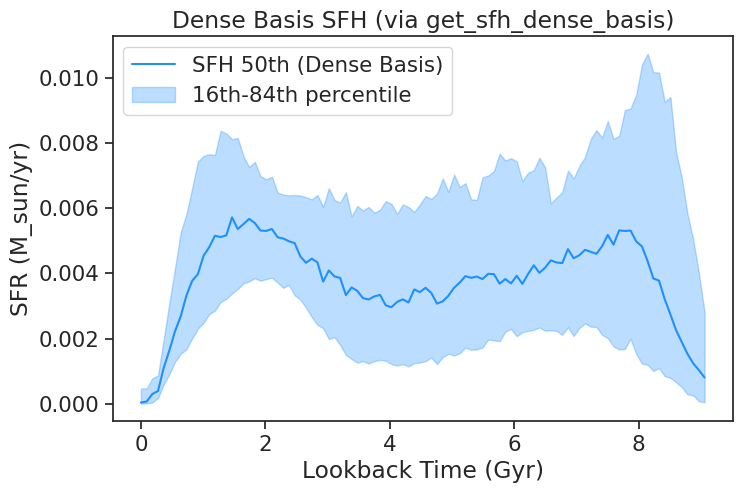

In [13]:
# Example: Get SFH data from Dense Basis
time_db, sfh16_db, sfh50_db, sfh84_db = cg.get_sfh_dense_basis()

print("Dense Basis SFH data retrieved.")
print(f"Time axis shape: {time_db.shape}")
print(f"SFH 50th percentile shape: {sfh50_db.shape}")

# You could then plot this data, for example:
plt.figure(figsize=(8,5))
plt.plot(time_db, sfh50_db, color='dodgerblue', label='SFH 50th (Dense Basis)')
plt.fill_between(time_db, sfh16_db, sfh84_db, color='dodgerblue', alpha=0.3, label='16th-84th percentile')
plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("SFR (M_sun/yr)")
plt.title("Dense Basis SFH (via get_sfh_dense_basis)")
plt.legend()
plt.show()

Feel free to explore other keys listed by `list_keys()` and retrieve their data using `get_key()` or the specific getter methods to perform your own analyses!